# Data challenge template

#### Whitney B. Reiner

# Data Challenge 7: Credit Card Benefits
_________________________________________________________________________________________________________________

## Problem statement:
_______________________________

### The Goal

You work as a data scientist at a credit card company. A senior VP is leading an effort to reduce costs associated with signup incentives by offering credit cards with carefully targeted benefits that will attract new cardholders. As a first step, she would like you to examine cardholder data collected over the last 6 months in order to understand the various kinds of users who use the company’s products. She is especially interested in getting an idea of which benefits to associate with each new card offering.

### The Data
The data consists of a csv file with 8950 rows (one for each cardholder) organized in columns with descriptive headers.
________________________________________

## Plan and considerations

(After you finish include:

Using X, I found...)
___________________________________

## Contents:

Section 1: Loading, examining, cleaning the data.

Section 2: Exploratory Data Analysis and Visualization

Section 3: Modeling

Section 4: Results and Conclusion 

_______________________________________

### Import known dependencies 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from IPython.display import display # Allows the use of display() for dataframes
# Set display options

%matplotlib inline
pd.options.display.max_columns = 150

Loading data

In [2]:
# Load data
df = pd.read_csv('/Users/whitneyreiner/Documents/GitHub/DataChallenges/18C/data_challenge_7/cc_info.csv')

display(df.head())

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
#counting the number of rows in your data
number_of_samples = df.count()

#viewing it
print("Number of samples:", str(number_of_samples))

Number of samples: CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64


# What do the columns represent?

Data dictionary from: https://www.kaggle.com/kashyaprahul/credit-card-segmentation/version/1#CREDIT%20CARD%20-%20SEGMENTATION%20CASE%20STUDY.pdf

* CUST_ID: credit card holder ID.
* BALANCE: MONTHLY AVERAGE balance (based on daily balanced averages)
* BALANCE_FREQUENCY: Ratio of last 12 months with balance.
* PURCHASES: Total amount spent during the last 12 months.
* ONEOFF_PURCHASES: Amount spent on regular purchases.
* INSTALLMENTS_PURCHASES: Amount of money spent on items paid in installments.
* CASH_ADVANCE: Total cash-advance amount.
* PURCHASES_FREQUENCY: Frequency of purchases (% of months with at least one purchase).
* ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off purchases (% of months with at least one one-off purchase).
* PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of one-off purchases (% of months with at least one installment purchase).
* CASH_ADVANCE_FREQUENCY: Frequency of cash advances (% of months with at least one cash-advance).
* CASH_ADVANCE_TRX: Average amount per cash-advance transaction.
* PURCHASES_TRX: Average amount per purchase transaction.
* CREDIT_LIMIT: Credit limit
* PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period.
* MINIMUM_PAYMENTS: Total minimum payment due in the billing period.
* PRC_FULL_PAYMENT: Percentage of months with full payment of the due statement balance.
* TENURE : Number of MONTHS as a customer.

#### Things to do (feature engineering ideas) to create customer profiles:
Monthly average purchase and cash advance amounts
purchases by type (one-off, installments)
Average amount per purchase and cash advance transaction
Limit usage (balance to credit limit ratio)
Ratio of payments to minimum payments
Purchases to credit limit ratio
Customer tenure versus credit limit

## Check out your data:
### (Preliminary)

In [5]:
df.info() #all the info (col names, dtypes, row #, missing values) 
# remember that nulls may still be present but just not detectable as such by Pandas (e.g. a "?")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
df.describe() #descriptive stats for the df

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

From df.describe there are a few things to immediately take note of:
1. The longest tenure is only 12 months
2. The largest credit limit is $30K, the smallest is $50

Basic descriptive statistics

Summarizing & cleaning data:

(More in-depth)

In [4]:
# It's often helpful to have a count of unique values in each column:
def nunicol(df):
    summary = []
    for i in range(0, len(df.columns)):
        summary.append(df.iloc[:,i].nunique())
    
    summary = pd.DataFrame([summary])
    summary.columns = df.columns
    
    return summary

nunicol(df)

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     8950     8871                 43       6203              4014   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    4452          4323                   47   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                          47                                47   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                      54                65            173           205   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      8711              8636                47       7

In [5]:
# The columns are all caps., change them to lowercase becasue it is easier to type.
df.columns = df.columns.str.lower()

In [7]:
df=df.rename(columns=lambda x: x.strip())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
cust_id                             8949 non-null object
balance                             8949 non-null float64
balance_frequency                   8949 non-null float64
purchases                           8949 non-null float64
oneoff_purchases                    8949 non-null float64
installments_purchases              8949 non-null float64
cash_advance                        8949 non-null float64
purchases_frequency                 8949 non-null float64
oneoff_purchases_frequency          8949 non-null float64
purchases_installments_frequency    8949 non-null float64
cash_advance_frequency              8949 non-null float64
cash_advance_trx                    8949 non-null int64
purchases_trx                       8949 non-null int64
credit_limit                        8949 non-null float64
payments                            8949 non-null float64
minimum_payments            

### Look at the NA values and look at the data, is it imbalanced?

NA values
* CREDIT_LIMIT                        8949 non-null float64
* MINIMUM_PAYMENTS                    8637 non-null float64

These two both have NAs. Since the credit_limit should not be NA, this row should be removed. However, it is possible that the min payments NA is NA when it should be zero, perhaps these people did not use their CCs? Look into this.

In [8]:
# remove row with NA credit limit
df=df[~df['credit_limit'].isnull()]

In [9]:
# make sure the customer IDs are unique
df.cust_id.nunique()

8949

In [10]:
df[df['minimum_payments'].isnull()]

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
3     C10004  1666.670542           0.636364    1499.00           1499.00   
45    C10047  2242.311686           1.000000     437.00             97.00   
47    C10049  3910.111237           1.000000       0.00              0.00   
54    C10056     6.660517           0.636364     310.00              0.00   
55    C10057  1311.995984           1.000000    1283.90           1283.90   
56    C10058  3625.218146           1.000000     313.27            313.27   
63    C10065     7.152356           0.090909     840.00            840.00   
93    C10098  1307.717841           1.000000     405.60            405.60   
94    C10099  2329.485768           1.000000     213.34            213.34   
97    C10102  3505.671311           1.000000       0.00              0.00   
99    C10104     0.000000           0.000000       0.00              0.00   
103   C10108     0.624240           0.090909     389.96              0.00   
111   C10116  3393.351236           1.000000       0.00              0.00   
121   C10126  1464.324632           1.000000    1174.39           1174.39   
129   C10135    69.405545           0.090909       0.00              0.00   
130   C10136   116.654149           0.272727     907.00            907.00   
142   C10148  5347.814547           1.000000       0.00              0.00   
146   C10152    19.354559           0.909091     689.70              0.00   
156   C10162  5837.105453           1.000000    3488.49           3262.25   
176   C10182  1872.926275           1.000000     766.61            766.61   
181   C10187     0.000000           0.000000      23.00              0.00   
183   C10189     5.465999           0.090909     196.81            173.00   
188   C10194   861.001207           1.000000     969.56            969.56   
191   C10198   189.687964           1.000000      66.14             66.14   
215   C10223     2.433254           0.181818      36.00              0.00   
235   C10244  4014.388265           1.000000    1189.52           1189.52   
240   C10249  3215.511032           0.818182    1112.20           1112.20   
277   C10288    32.124999           0.272727     380.89            380.89   
309   C10320   566.908563           1.000000     397.06            303.70   
312   C10323   515.904786           1.000000    5359.02           2399.78   
...      ...          ...                ...        ...               ...   
8483  C18713     2.433343           0.166667       0.00              0.00   
8484  C18714     0.000000           0.000000     120.82              0.00   
8491  C18721    13.084067           0.090909     350.00            350.00   
8500  C18731     0.000000           0.000000     113.00              0.00   
8504  C18735     0.021102           0.125000       0.00              0.00   
8505  C18736    11.918653           0.100000     276.79            276.79   
8519  C18750    11.748193           0.181818      80.75             80.75   
8561  C18794     3.229304           0.545455     190.20              0.00   
8565  C18798    19.125876           0.090909     275.86            171.98   
8583  C18817  1029.111236           0.909091       0.00              0.00   
8593  C18827    16.887571           0.363636    1083.00           1083.00   
8596  C18830    37.123618           0.857143      84.24              0.00   
8619  C18853     7.696813           0.090909     111.30            111.30   
8647  C18882     0.006651           0.142857       0.00              0.00   
8697  C18934    10.652530           0.181818     209.20              0.00   
8718  C18955    18.885677           0.375000      57.00             57.00   
8719  C18956   165.240633           0.181818       0.00              0.00   
8739  C18977  1367.703777           0.909091     153.00              0.00   
8743  C18982    40.960739           0.181818     472.75            431.37   
8746  C18985  2856.473263           1.000000    1200.00           1200.00   
8

Looking at the column descriptions and the data where min. payments is null, there is not way to be sure that the min. payments = NA should be zero and are not actually errors in the data. Until I figure this out, it is best to remove these rows so as not to skew the data by using erroneous records. The % of these rows out of all the data is small enough that it is OK, and the better choice because bad data in=> bad data out.

In [11]:
# Remove rows where min. payment is null
df=df[~df['minimum_payments'].isnull()]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
cust_id                             8636 non-null object
balance                             8636 non-null float64
balance_frequency                   8636 non-null float64
purchases                           8636 non-null float64
oneoff_purchases                    8636 non-null float64
installments_purchases              8636 non-null float64
cash_advance                        8636 non-null float64
purchases_frequency                 8636 non-null float64
oneoff_purchases_frequency          8636 non-null float64
purchases_installments_frequency    8636 non-null float64
cash_advance_frequency              8636 non-null float64
cash_advance_trx                    8636 non-null int64
purchases_trx                       8636 non-null int64
credit_limit                        8636 non-null float64
payments                            8636 non-null float64
minimum_payments            

In [13]:
df.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.785000      0.000000             0.500000   
75%                484.147500   1132.385490             0.916667   
max              22500.000000  47137.211760             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 8636.000000                       8636.000000   
mean                     0.205909                          0.368820   
std                      0.300054                          0.398093   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             8636.000000       8636.000000    8636.000000   8636.000000   
mean                 0.137604          3.313918      15.033233   4522.091030   
std                  0.201791          6.912506      25.180468   3659.240379   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           payments  minimum_payments  prc_full_payment       tenure  
count   8636.000000       8636.000000       8636.000000  8636.000000  
mean    1784.478099        864.304943          0.159304    11.534391  
std     2909.810090       2372.566350          0.296271     1.310984  
min        0.049513          0.019163          0.000000     6.000000  
25%      418.559237        169.163545          0.000000    12.000000  
50%      896.675701        312.452292          0.000000    12.000000  
75%     1951.142090        825.496463          0.166667    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [16]:
df.iloc[0:0,1:]

Empty DataFrame
Columns: [balance, balance_frequency, purchases, oneoff_purchases, installments_purchases, cash_advance, purchases_frequency, oneoff_purchases_frequency, purchases_installments_frequency, cash_advance_frequency, cash_advance_trx, purchases_trx, credit_limit, payments, minimum_payments, prc_full_payment, tenure]
Index: []

In [14]:
# Certain customers may never do anything aside from one-off purchases- is this intuition correct?
from scipy.stats.mstats import mode

f = lambda x: mode(x, axis=None)[0]
df.iloc[1:,1:].groupby(level=0).apply(f)


1               [0.0]
2               [0.0]
4               [0.0]
5               [0.0]
6               [1.0]
7               [0.0]
8               [0.0]
9               [0.0]
10              [0.0]
11              [0.0]
12              [0.0]
13              [0.0]
14              [0.0]
15              [0.0]
16              [0.0]
17              [0.0]
18              [0.0]
19              [0.0]
20              [0.0]
21              [1.0]
22              [0.0]
23             [13.0]
24              [0.0]
25              [0.0]
26              [0.0]
27              [0.0]
28      [7152.864372]
29              [0.0]
30              [1.0]
31              [1.0]
            ...      
8915            [0.0]
8916            [0.0]
8917            [0.0]
8918            [0.0]
8920            [0.0]
8921            [0.0]
8922            [0.0]
8923            [0.0]
8924            [0.0]
8925            [0.0]
8926            [0.0]
8927            [0.0]
8928            [0.0]
8930            [0.0]
8931      

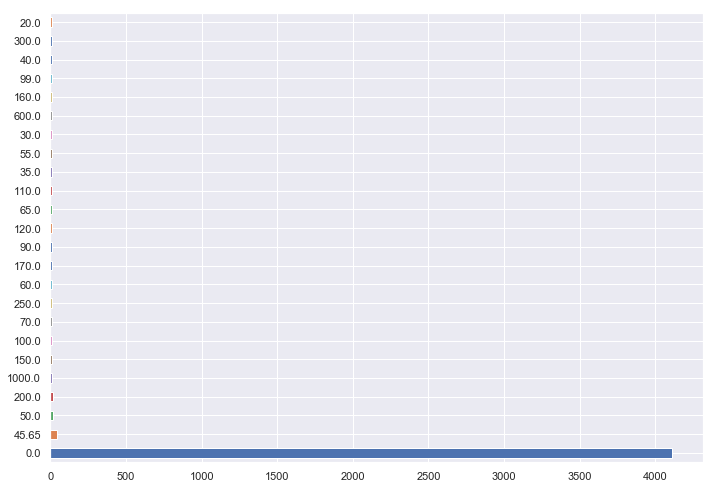

In [27]:
# Plot value_counts() in a bar chart- a frequency distribution
df['oneoff_purchases'].value_counts()[:20].plot(kind='barh')

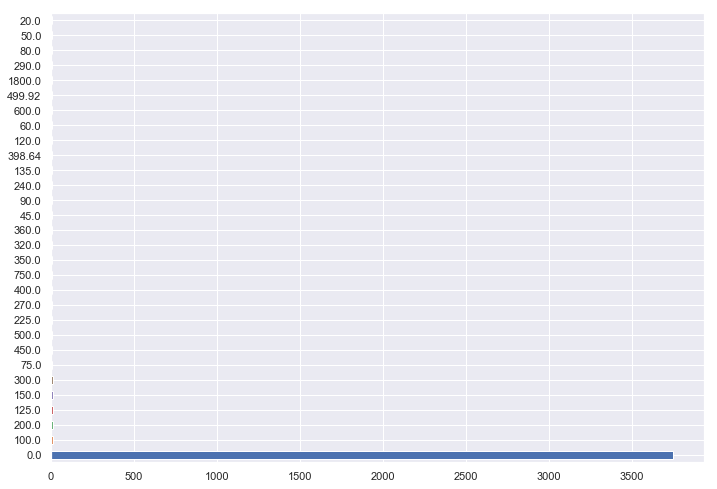

In [28]:
df['installments_purchases'].value_counts()[:20].plot(kind='barh')

In [33]:
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

In [ ]:
df['cash_advance'].value_counts().plot(kind='bar')

In [22]:
df[df['cash_advance']==0].count()

cust_id                             4431
balance                             4431
balance_frequency                   4431
purchases                           4431
oneoff_purchases                    4431
installments_purchases              4431
cash_advance                        4431
purchases_frequency                 4431
oneoff_purchases_frequency          4431
purchases_installments_frequency    4431
cash_advance_frequency              4431
cash_advance_trx                    4431
purchases_trx                       4431
credit_limit                        4431
payments                            4431
minimum_payments                    4431
prc_full_payment                    4431
tenure                              4431
dtype: int64

In [23]:
df[df['cash_advance']!=0].count()

cust_id                             4205
balance                             4205
balance_frequency                   4205
purchases                           4205
oneoff_purchases                    4205
installments_purchases              4205
cash_advance                        4205
purchases_frequency                 4205
oneoff_purchases_frequency          4205
purchases_installments_frequency    4205
cash_advance_frequency              4205
cash_advance_trx                    4205
purchases_trx                       4205
credit_limit                        4205
payments                            4205
minimum_payments                    4205
prc_full_payment                    4205
tenure                              4205
dtype: int64

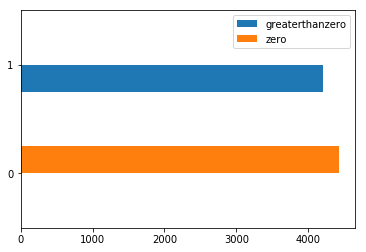

In [28]:
cash_adv=[{'zero':4431},{'greaterthanzero':4205}]
cash_adv=pd.DataFrame(cash_adv)
cash_adv.plot(kind='barh')

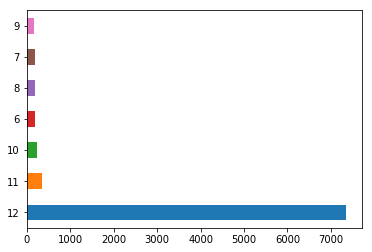

In [18]:
# Plot value_counts() in a bar chart- a frequency distribution
df['tenure'].value_counts().plot(kind='barh')

From the above charts we can see that there are probably some main user segments:

Many customers do not use cash advances, make installments purchases, or make one-off purchases.
Do customers tend to do one of the three? Is there a group that does a combo of them also?

The majority of customers have had their cc for 12 months.

In [29]:
#Make a correlation matrix to test this.

In [ ]:
# complete correlation matrix:
import seaborn as sns
%matplotlib inline



# calculate the correlation matrix
corr = df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Grouping

In [ ]:
# make a column with new values based on values in another column 

def label_col (row):
    if row['cash_advance'] > 0 :
      return 1
    else:
      return 0
   
df.apply (lambda row: label_col (row),axis=1)
#if you like the results then run it again and create a new col in the df with the results:
df['new_col'] = df.apply (lambda row: label_col (row),axis=1)

Graphs and Plots

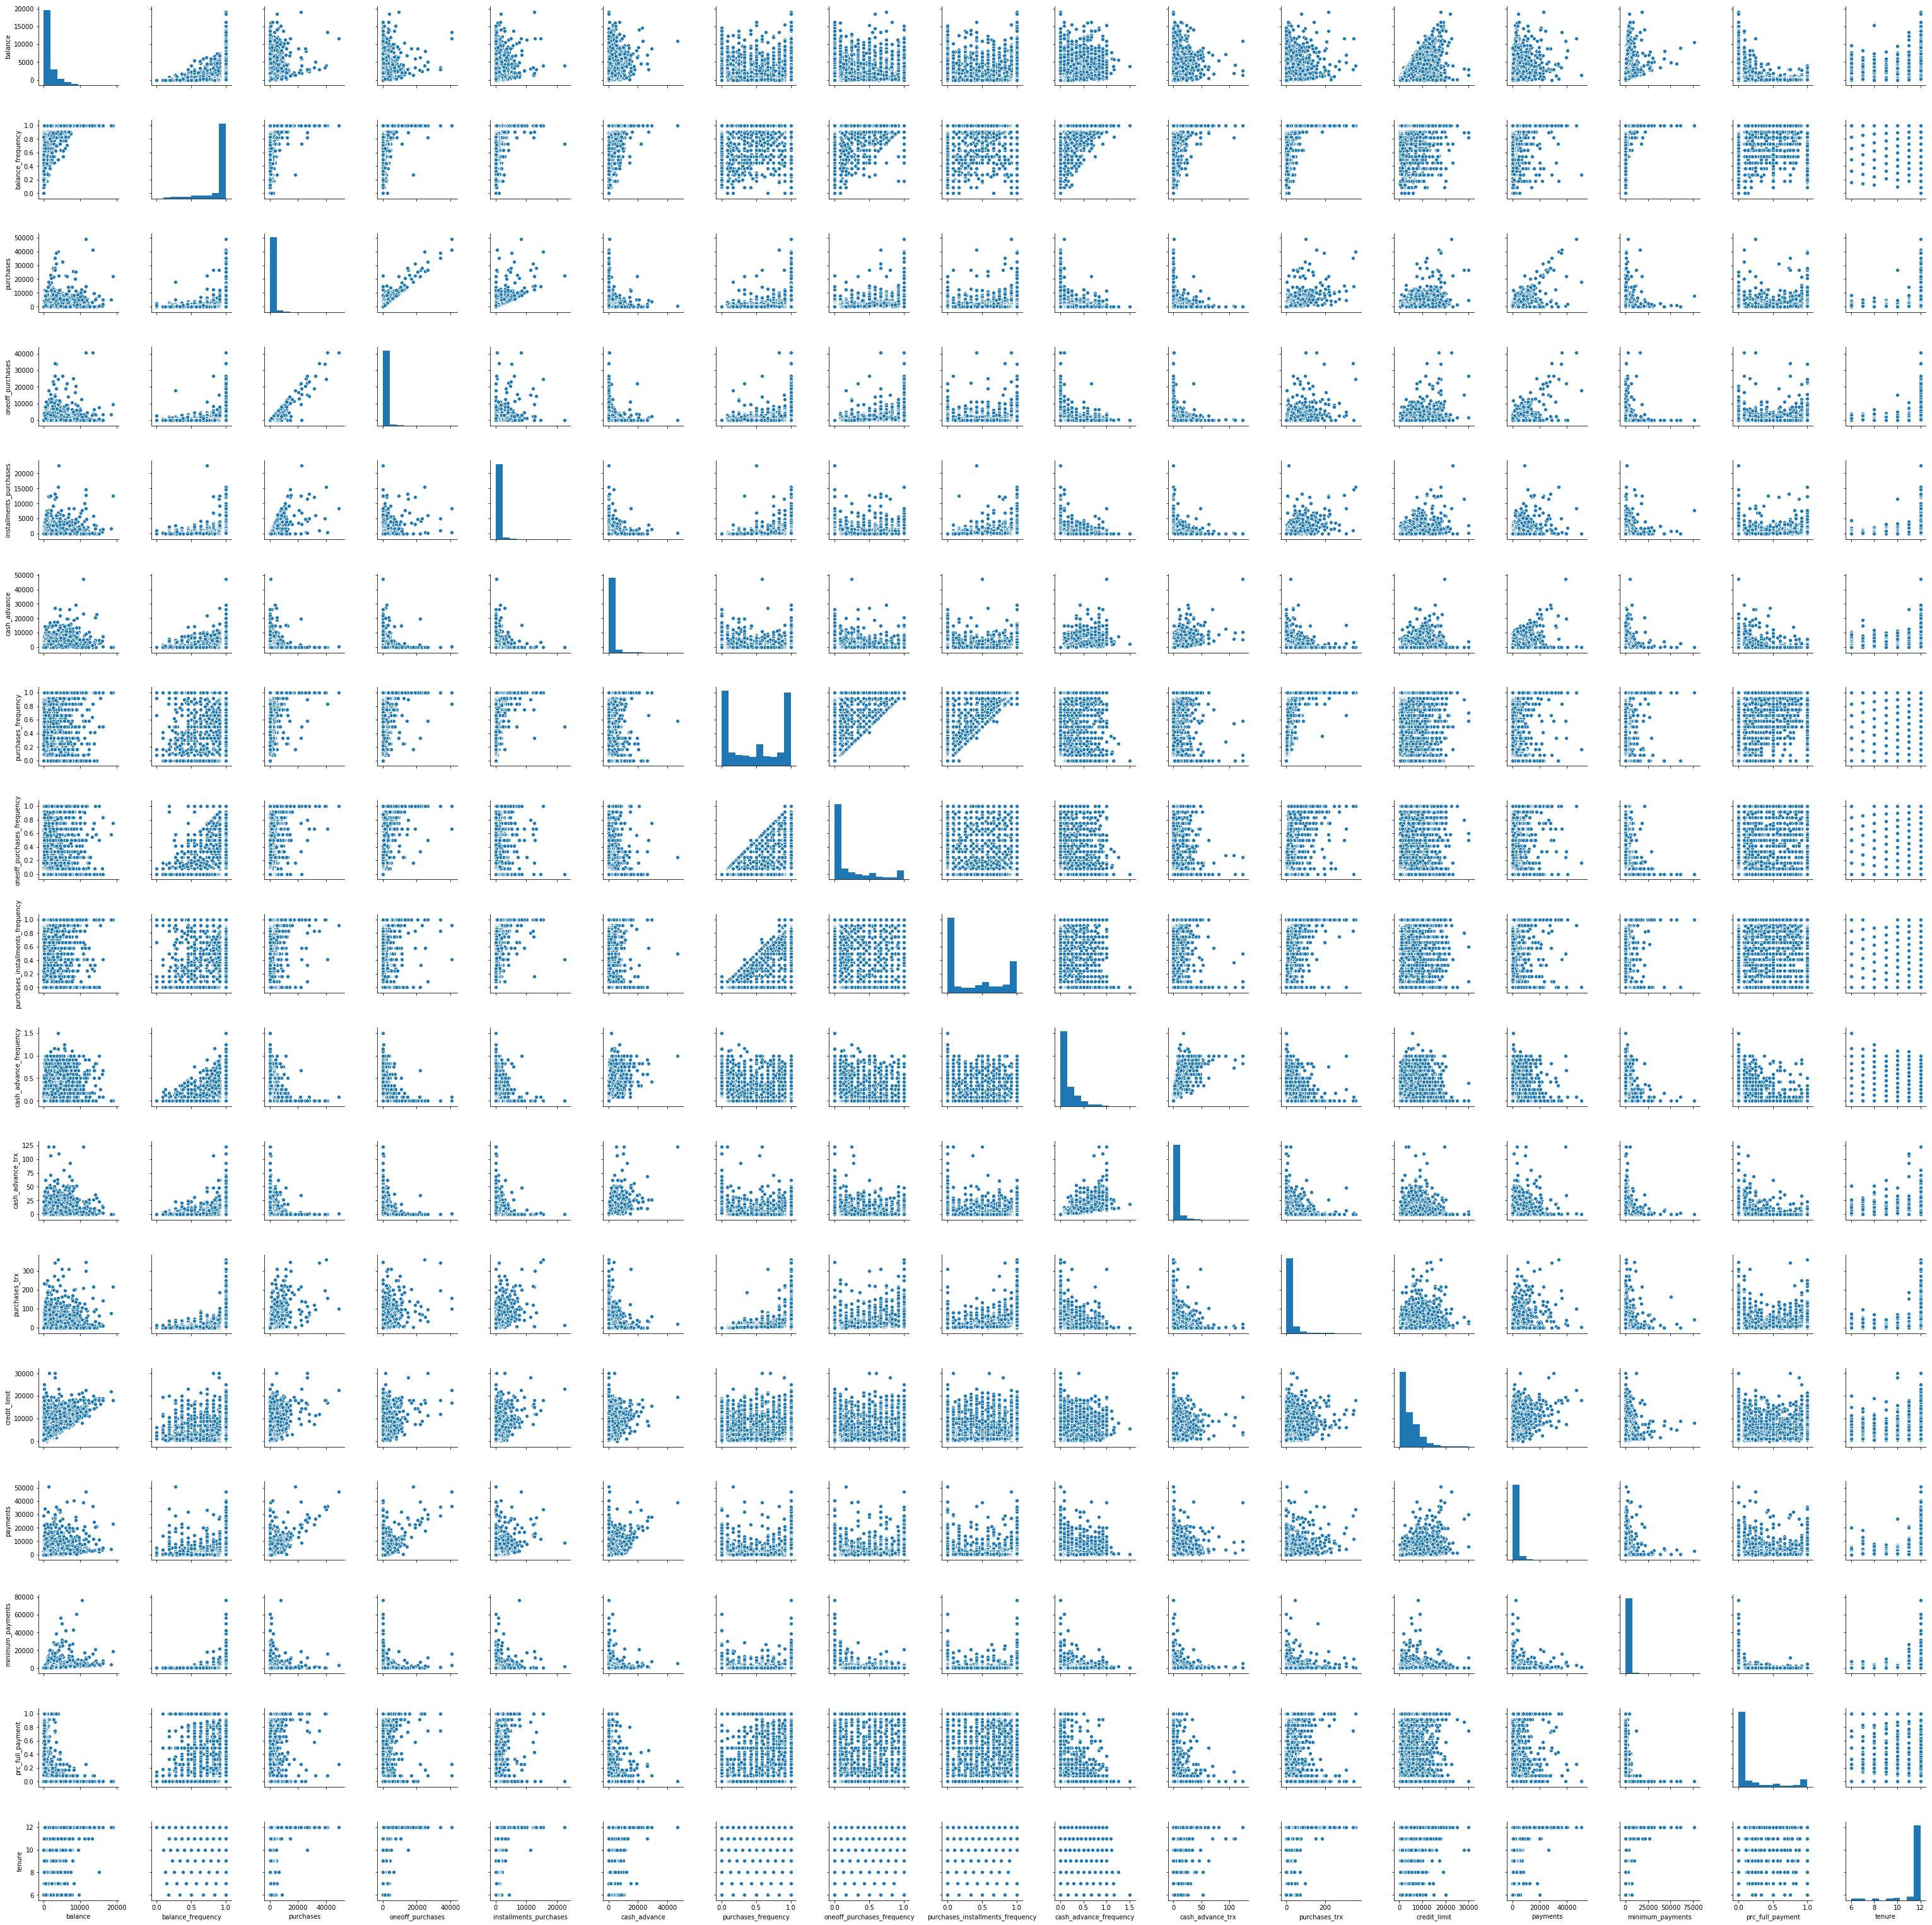

In [37]:
sns.pairplot(df, kind="scatter")

In [50]:
df.isnull().sum()

cust_id                             0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

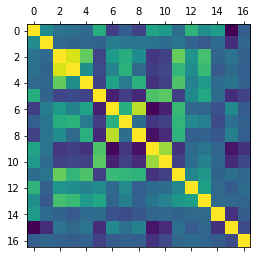

In [51]:
# Look for correlations in the features:

import matplotlib.pyplot as plt

plt.matshow(df.corr())

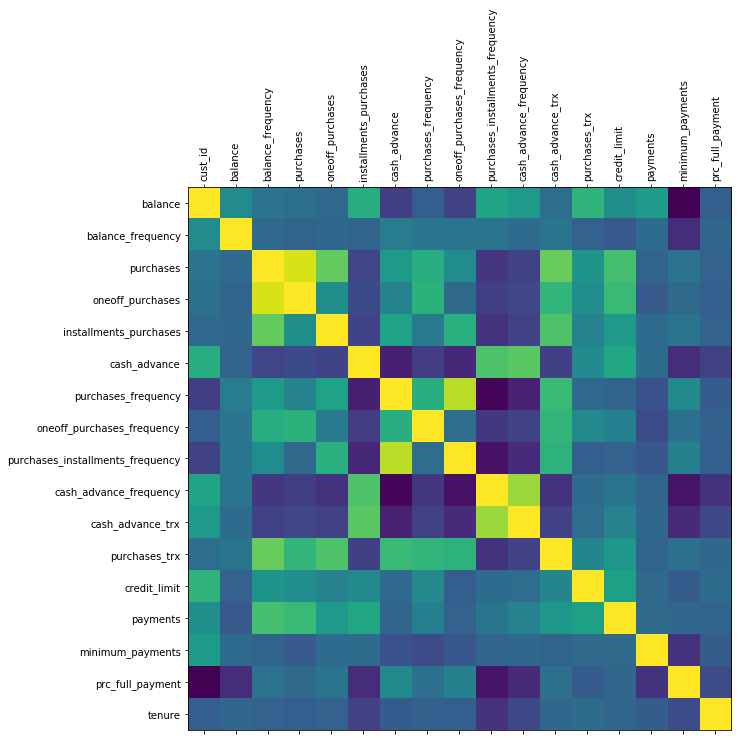

In [24]:
# corr with col names
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    ax.set_xticklabels(df,rotation=90)
plot_corr(df)

In [77]:
df2=df.loc[:, df.columns != "cust_id"]

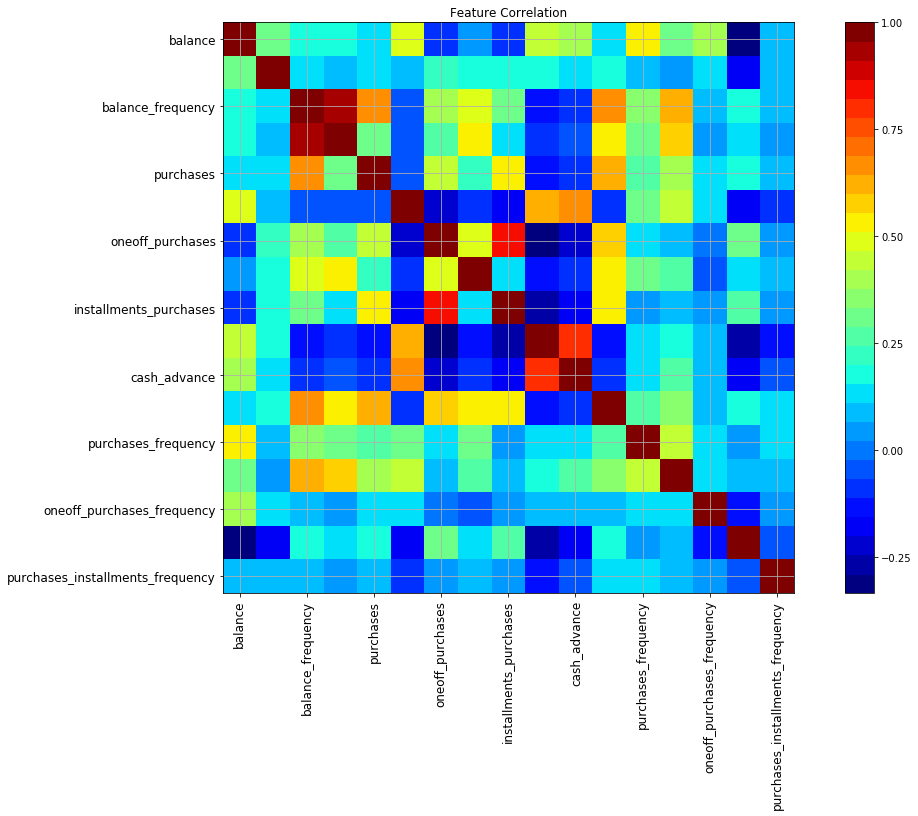

In [22]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=12)
    ax1.set_yticklabels(labels,fontsize=12)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-1,-.75,-.50,-.25,0,.25,.50,.75,1])
    ax1.set_xticklabels(df,rotation=90)
    plt.show()

correlation_matrix(df)

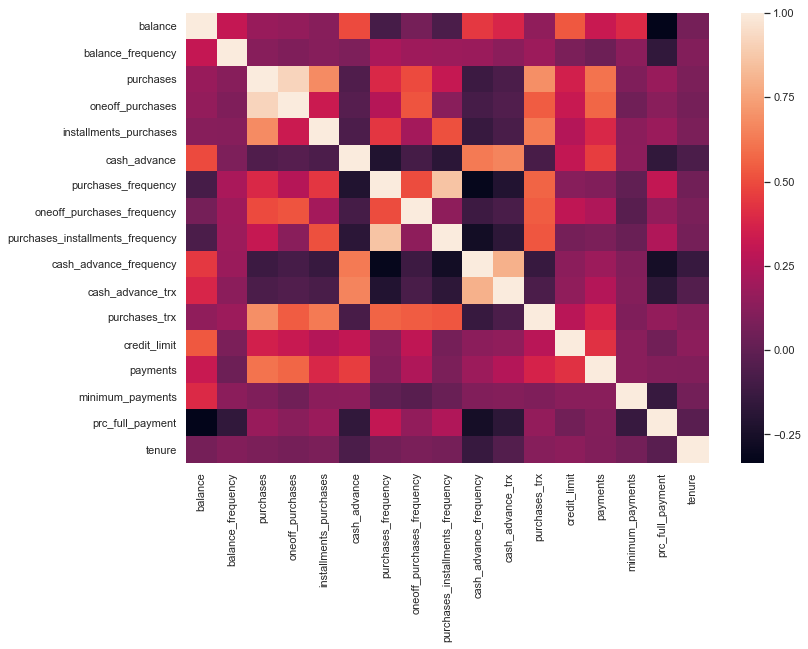

In [25]:

import seaborn as sns
%matplotlib inline



# calculate the correlation matrix
corr = df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

The purchases and purchase frequency are highly correlated, which is not surprising. But this should be OK for now to run through the clustering algorithm because it would be good to segment out those who don't fit that correlation.

In [26]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

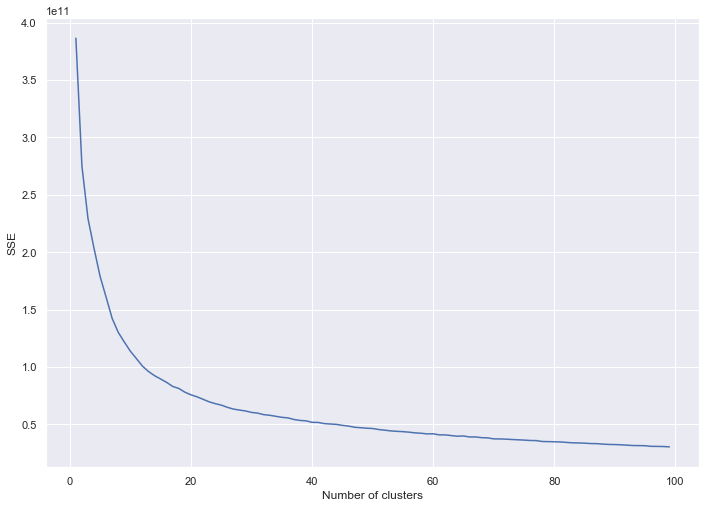

In [128]:
# Elbow method to select optimal clusters
 # clustering dataset
# determine k using elbow method
# I already removed cust id from the df and created a new df with only the values of the data
#df2=df.loc[:, df.columns != "cust_id"]
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df2
#print(X)
data = X

sse = {}
for k in range(1, 100):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [110]:
from sklearn.cluster import KMeans

df2.columns


Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure', 'clusters'],
      dtype='object')

In [113]:

X = df[['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )

/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [134]:
cluster_range = range( 30, 50 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [135]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df

num_clusters  cluster_errors
0             30    40264.728641
1             31    39624.397036
2             32    39131.879614
3             33    38495.403016
4             34    38103.549964
5             35    37676.679599
6             36    36994.684017
7             37    36693.140946
8             38    36397.742279
9             39    35940.709340
10            40    35458.196260
11            41    35224.470896
12            42    34703.203211
13            43    34291.983195
14            44    33841.230906
15            45    33822.332459
16            46    33355.178278
17            47    32900.394518
18            48    32879.212658
19            49    32625.032509

For n_clusters = 2 The average silhouette_score is : 0.2089232822022867


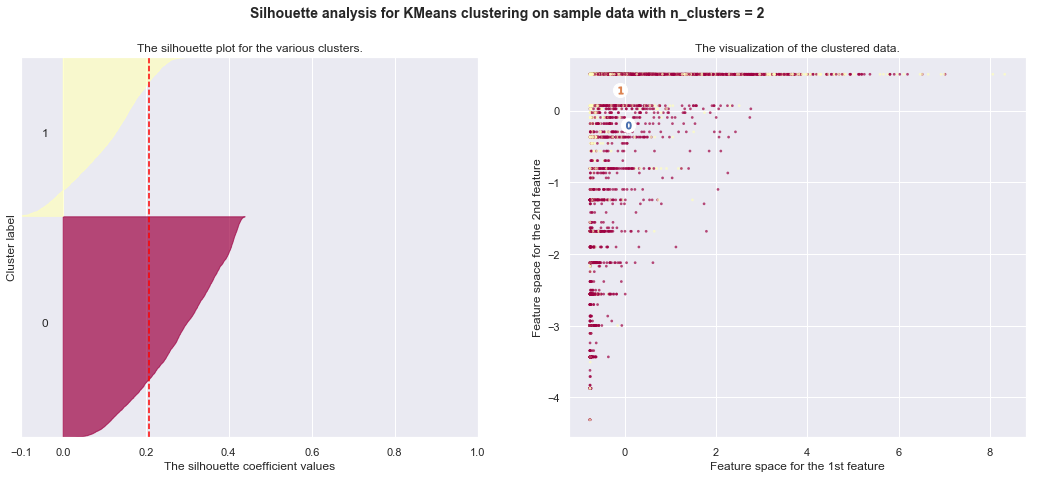

For n_clusters = 3 The average silhouette_score is : 0.18445521841115786


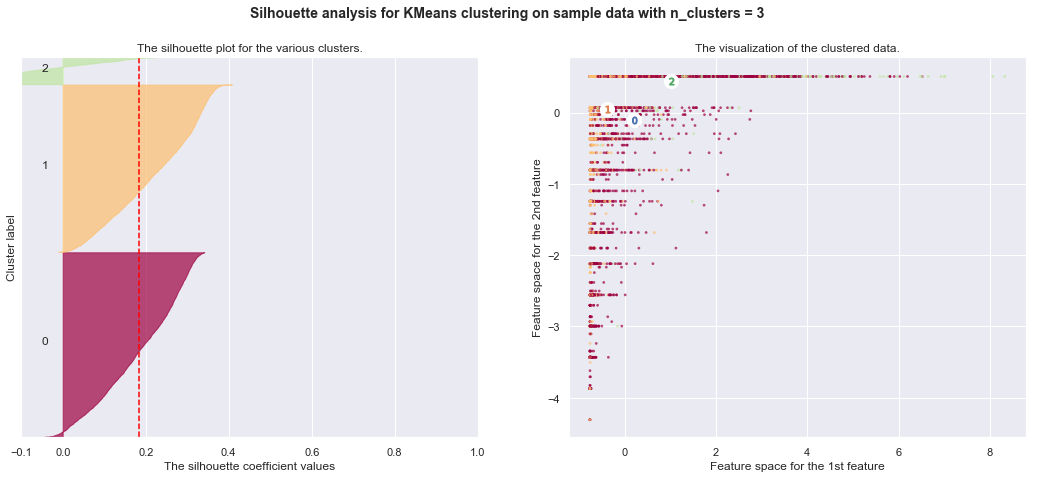

For n_clusters = 4 The average silhouette_score is : 0.1970633476945604


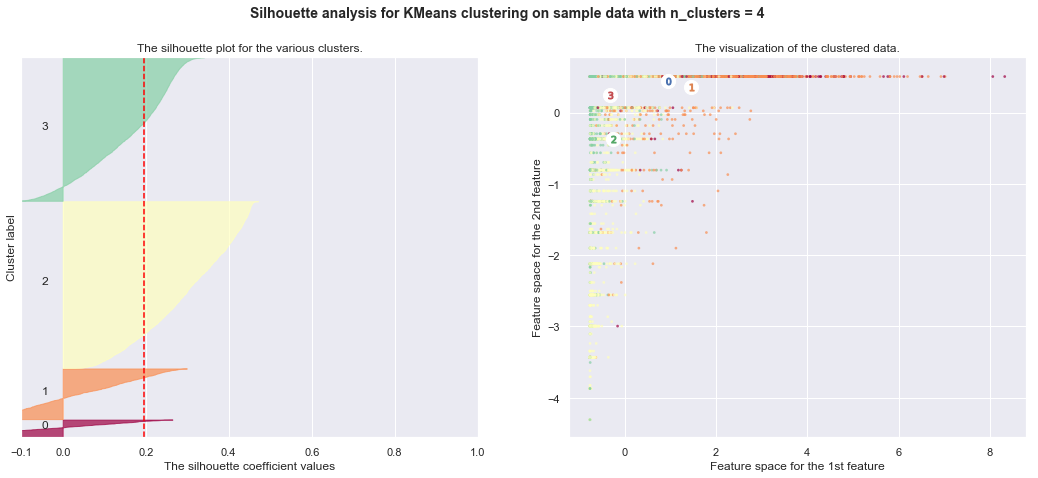

For n_clusters = 5 The average silhouette_score is : 0.19207215719187282


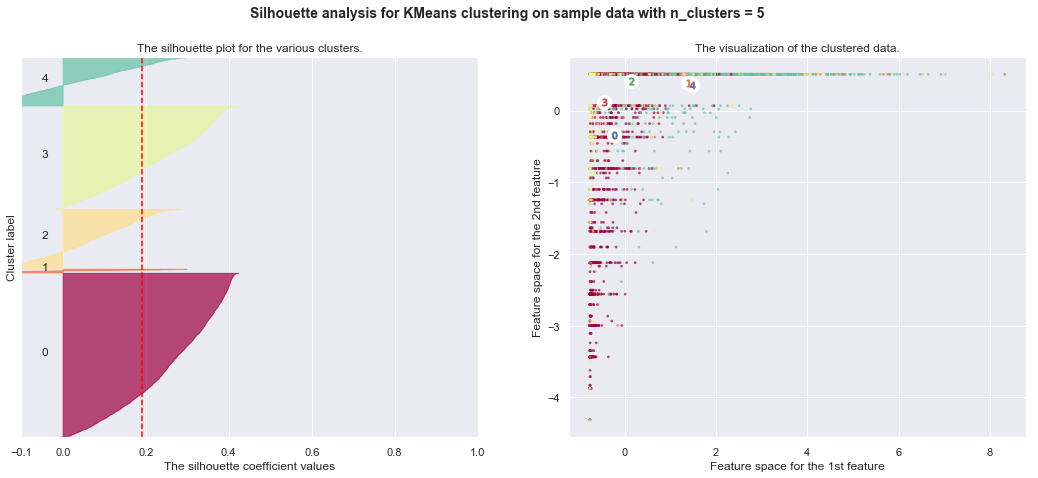

In [125]:
import matplotlib.cm as cm


from sklearn.metrics import silhouette_samples, silhouette_score


cluster_range = range( 2, 6 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( X_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.Spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  cmap = cm.get_cmap("Spectral") 
  colors = cmap(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

For n_clusters = 32 The average silhouette_score is : 0.1811953762288087


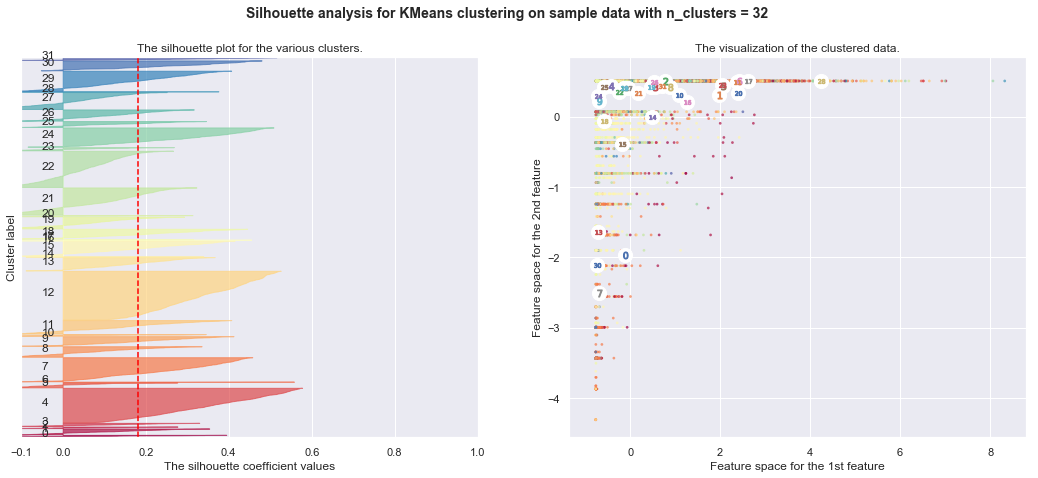

For n_clusters = 33 The average silhouette_score is : 0.17648916263357486


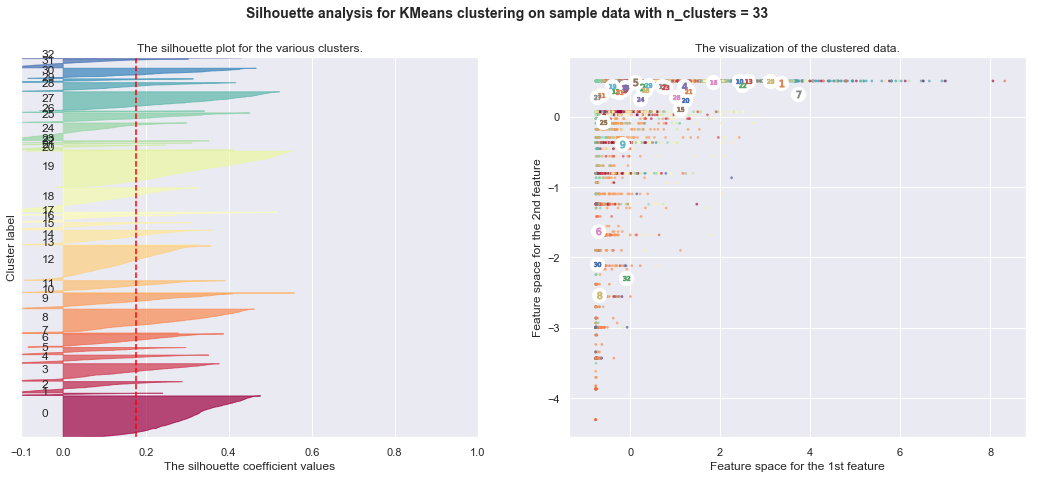

For n_clusters = 34 The average silhouette_score is : 0.17213718489268343


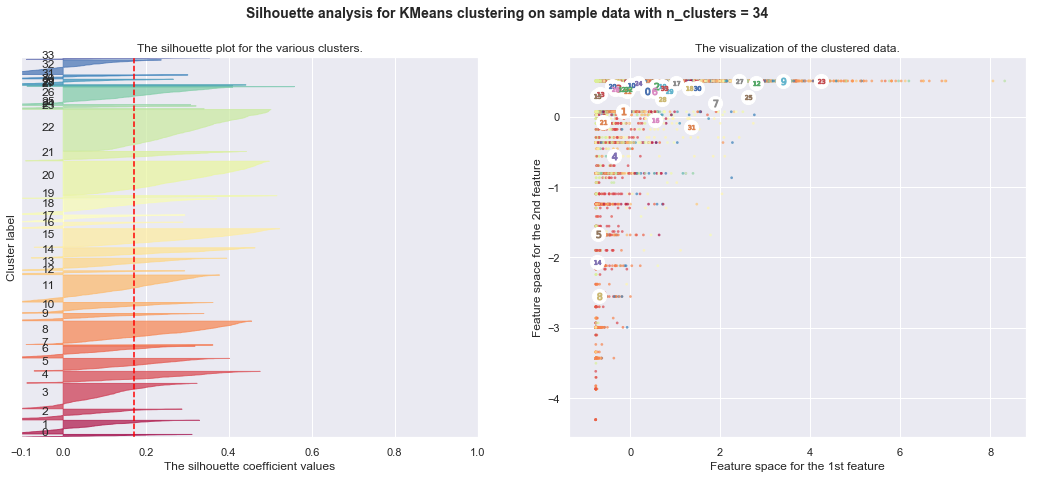

For n_clusters = 35 The average silhouette_score is : 0.1833530505678445


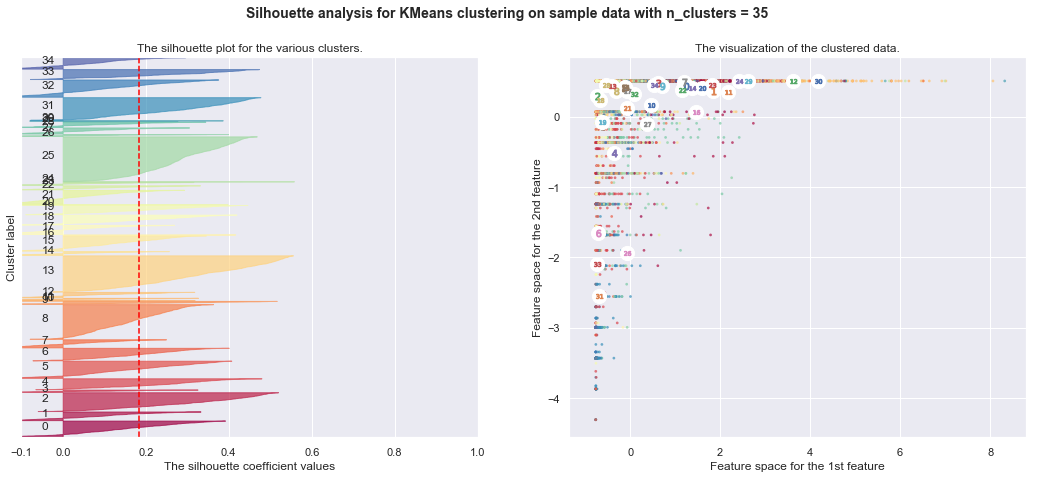

For n_clusters = 36 The average silhouette_score is : 0.18276851419466986


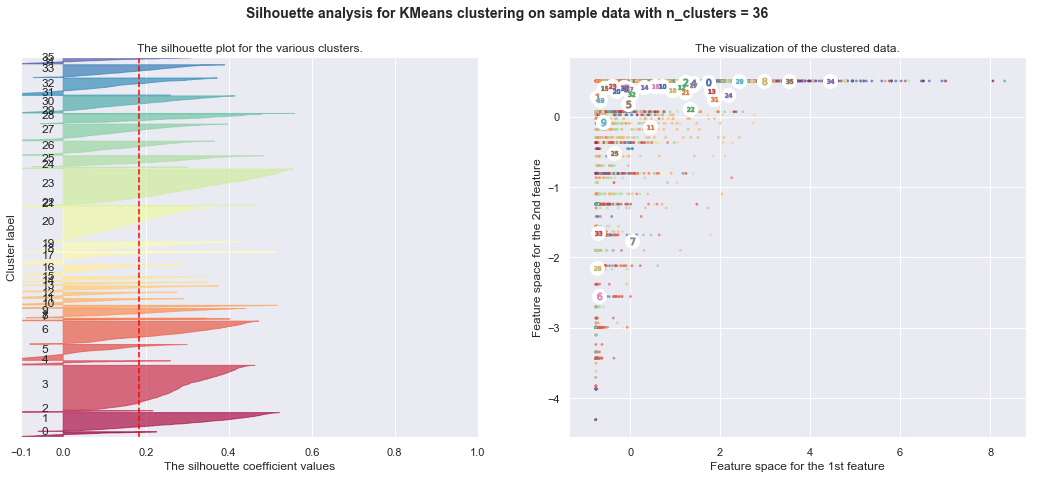

For n_clusters = 37 The average silhouette_score is : 0.18184203220400746


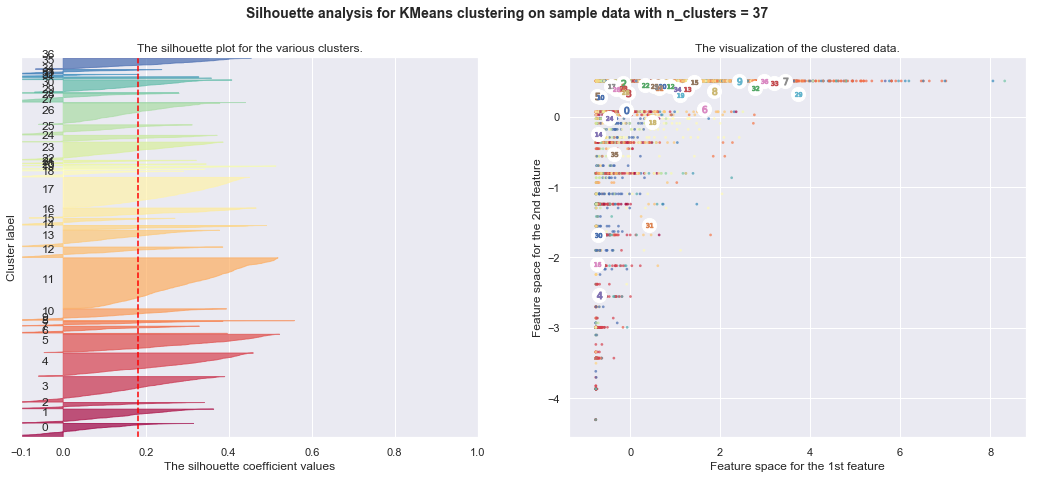

For n_clusters = 38 The average silhouette_score is : 0.1789123004782132


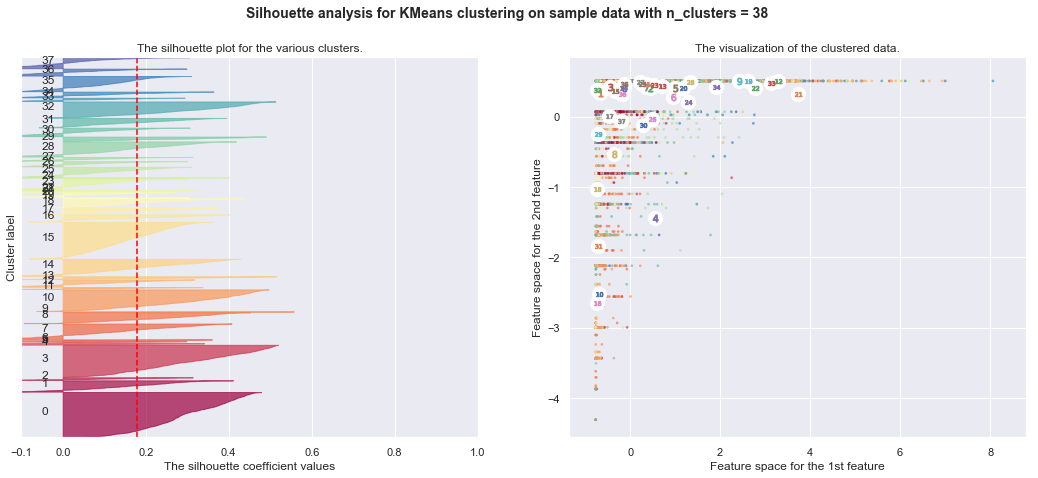

For n_clusters = 39 The average silhouette_score is : 0.1799249522715102


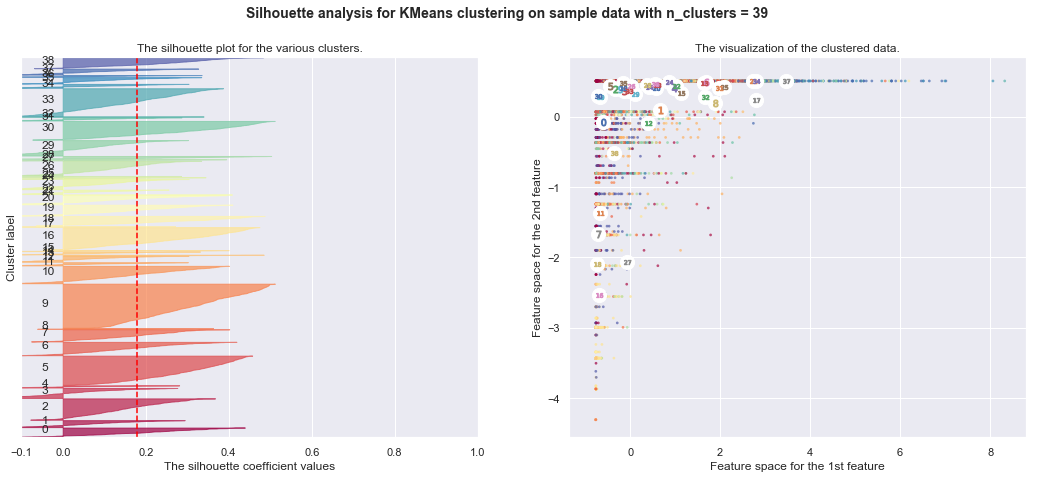

In [139]:
# try more clusters
import matplotlib.cm as cm


from sklearn.metrics import silhouette_samples, silhouette_score


cluster_range = range( 32, 40)

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( X_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.Spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  cmap = cm.get_cmap("Spectral") 
  colors = cmap(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

In [ ]:
# Feature engineering

In [203]:
# Calculate monthly average purchases using purchases and tenure
df['avg_month_purchase']=df['purchases']/df['tenure']
df['avg_month_cash_adv']=df['cash_advance']/df['tenure']


In [204]:
df.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      payments  minimum_payments  prc_full_payment  tenure  \
0   201.802084        139.509787          0.000000      12   
1  4103.032597       1072.340217          0.222222      12   
2   622.066742        627.284787          0.000000      12   
4   678.334763        244.791237          0.000000      12   
5  1400.057770       2407.246035          0.000000      12   

   r_bal_credit_limit  r_cash_adv_purch  r_inst_purch  r_purch_credit_limit  \
0            4.090075          0.000000         100.0              9.540000   
1           45.749535               inf           NaN              0.000000   
2           33.268651          0.000000           0.0             10.308933   
4           68.142861          0.000000           0.0              1.333333   
5          100.546042          0.000000         100.0             74.071111   

   r_bal_payment  avg_month_purchase  avg_month_cash_adv  
0      20.267754            7.950000            0.000000  
1      78.051230            0.000000          536.912124  
2     401.106295           64.430833            0.000000  
4     120.547314            1.333333            0.000000  
5     129.268148          111.106667            0.000000

In [ ]:
Monthly average purchase and cash advance amounts
purchases by type (one-off, installments)
Average amount per purchase and cash advance transaction
Limit usage (balance to credit limit ratio)
Ratio of payments to minimum payments
Purchases to credit limit ratio
Customer tenure versus credit limit

Important features only:

* cash_advance_trx (avg amount cash advance)
* purchase_trx (avg amount purchases)
* oneoff_purchases_frequency
* purchases_installments_frequency
* cash_advance_frequency
* balance_frequency
* prc_full_payment
*** Need to engineer these:
* ratio of balance to credit limit
* ratio of cash_advance to total purchases
* ratio of installments to total purchases
* ratio of purchases to credit limit
* ratio of balance to payment

Why leave out the following features?
PURCHASES: Total amount spent during the last 12 months. # it is better to focus on customers who make more frequenct purchases, and the TRX purchase will reflect the total purchase amount anyway
ONEOFF_PURCHASES: Amount spent on regular purchases. # this is reflected in both the one off purchases frequency and the avg purchases amount
INSTALLMENTS_PURCHASES: Amount of money spent on items paid in installments.: Same as above
CASH_ADVANCE: Total cash-advance amount. #Same as above
PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period. #this is reflected in ratio of balance to payment
TENURE : Number of MONTHS as a customer. # this is under 12 months for everyone, and the majority are @ 12 months, so it won't help segmentation much

In [ ]:
# Create features
# ratio of balance to credit limit
# ratio of cash_advance to total purchases
# ratio of installments to total purchases
# ratio of purchases to credit limit
# ratio of balance to payment

In [161]:
df['r_bal_credit_limit']= df['balance']/df['credit_limit']*100
df['r_cash_adv_purch']= df['cash_advance']/df['purchases']*100
df['r_inst_purch']= df['installments_purchases']/df['purchases']*100
df['r_purch_credit_limit']= df['purchases']/df['credit_limit']*100
df['r_bal_payment']= (df['balance']/df['payments'])*100
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure', 'r_bal_credit_limit',
       'r_cash_adv_purch', 'r_inst_purch', 'r_purch_credit_limit',
       'r_bal_payment'],
      dtype='object')

In [162]:
columns=[ 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'payments', 'tenure']
df_eng=df.drop(columns=columns)

In [164]:
df_eng=df.drop(columns='balance_frequency')

In [165]:
df_eng.columns

Index(['cust_id', 'balance', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure', 'r_bal_credit_limit', 'r_cash_adv_purch', 'r_inst_purch',
       'r_purch_credit_limit', 'r_bal_payment'],
      dtype='object')

In [167]:
df_eng=df_eng.dropna(axis=1)
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 20 columns):
cust_id                             8636 non-null object
balance                             8636 non-null float64
purchases                           8636 non-null float64
oneoff_purchases                    8636 non-null float64
installments_purchases              8636 non-null float64
cash_advance                        8636 non-null float64
purchases_frequency                 8636 non-null float64
oneoff_purchases_frequency          8636 non-null float64
purchases_installments_frequency    8636 non-null float64
cash_advance_frequency              8636 non-null float64
cash_advance_trx                    8636 non-null int64
purchases_trx                       8636 non-null int64
credit_limit                        8636 non-null float64
payments                            8636 non-null float64
minimum_payments                    8636 non-null float64
prc_full_payment            

In [168]:
df_eng.head()

cust_id      balance  purchases  oneoff_purchases  installments_purchases  \
0  C10001    40.900749      95.40              0.00                   95.40   
1  C10002  3202.467416       0.00              0.00                    0.00   
2  C10003  2495.148862     773.17            773.17                    0.00   
4  C10005   817.714335      16.00             16.00                    0.00   
5  C10006  1809.828751    1333.28              0.00                 1333.28   

   cash_advance  purchases_frequency  oneoff_purchases_frequency  \
0      0.000000             0.166667                    0.000000   
1   6442.945483             0.000000                    0.000000   
2      0.000000             1.000000                    1.000000   
4      0.000000             0.083333                    0.083333   
5      0.000000             0.666667                    0.000000   

   purchases_installments_frequency  cash_advance_frequency  cash_advance_trx  \
0                          0.083333                    0.00                 0   
1                          0.000000                    0.25                 4   
2                          0.000000                    0.00                 0   
4                          0.000000                    0.00                 0   
5                          0.583333                    0.00                 0   

   purchases_trx  credit_limit     payments  minimum_payments  \
0              2        1000.0   201.802084        139.509787   
1              0        7000.0  4103.032597       1072.340217   
2             12        7500.0   622.066742        627.284787   
4              1        1200.0   678.334763        244.791237   
5              8        1800.0  1400.057770       2407.246035   

   prc_full_payment  tenure  r_bal_credit_limit  r_purch_credit_limit  \
0          0.000000      12            4.090075              9.540000   
1          0.222222      12           45.749535              0.000000   
2          0.000000      12           33.268651             10.308933   
4          0.000000      12           68.142861              1.333333   
5          0.000000      12          100.546042             74.071111   

   r_bal_payment  
0      20.267754  
1      78.051230  
2     401.106295  
4     120.547314  
5     129.268148

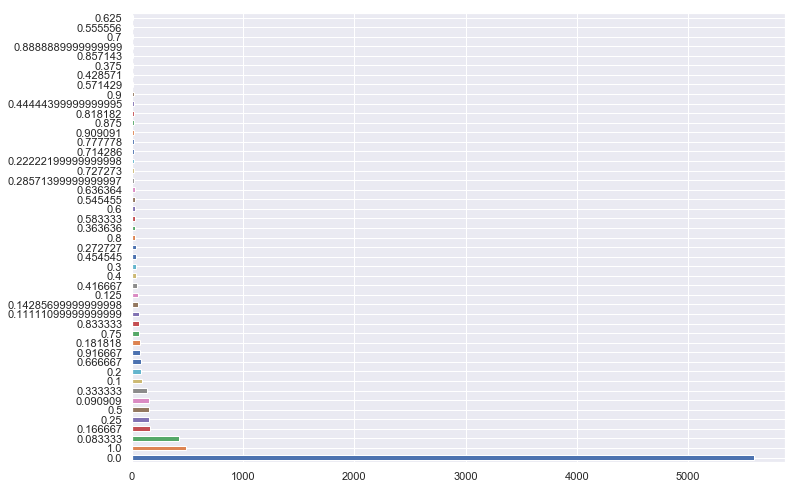

In [169]:
# Plot value_counts() in a bar chart- a frequency distribution
df_eng['prc_full_payment'].value_counts().plot(kind='barh')

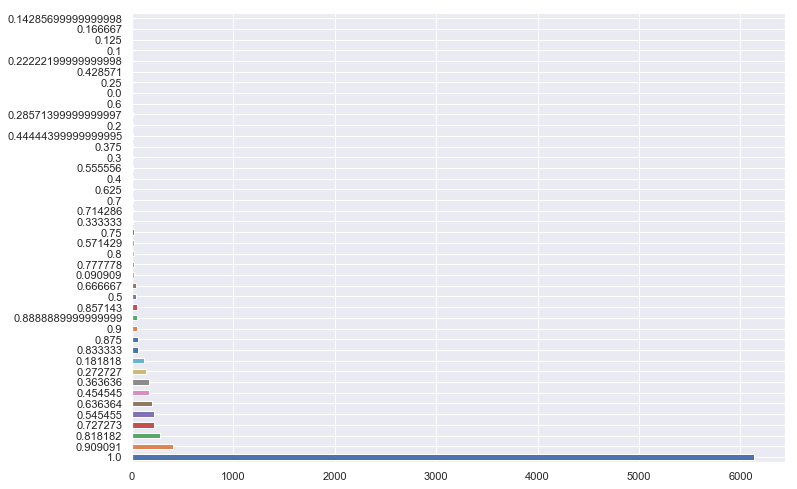

In [151]:
df_eng['balance_frequency'].value_counts().plot(kind='barh')

Most customers never pay their bills in full every month, so balance frequency and prc_full_payment are not great ways to segment the customers

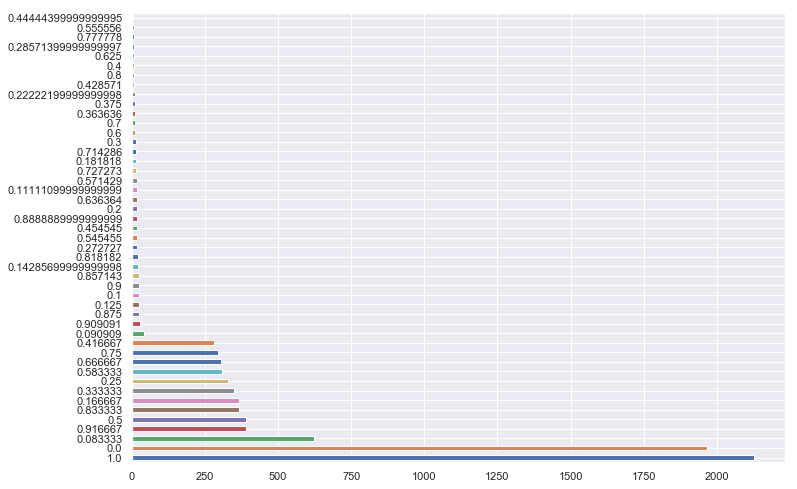

In [170]:
df_eng['purchases_frequency'].value_counts().plot(kind='barh')

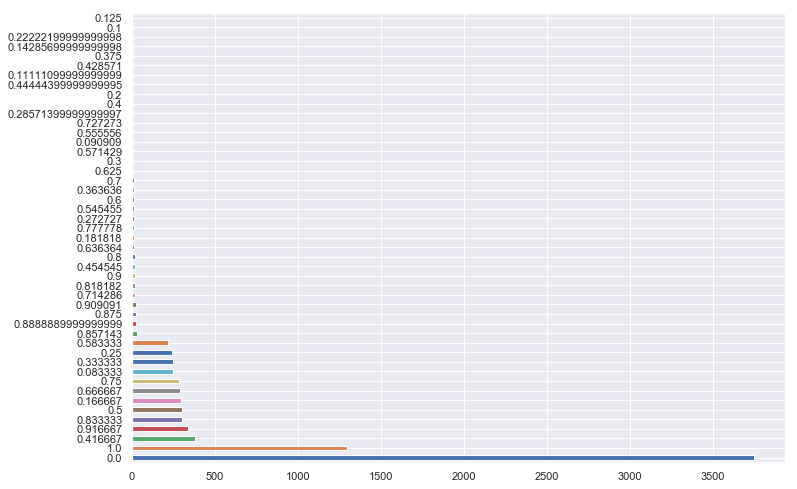

In [171]:
df_eng['purchases_installments_frequency'].value_counts().plot(kind='barh')

In [173]:
df_eng.columns

Index(['cust_id', 'balance', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure', 'r_bal_credit_limit', 'r_purch_credit_limit',
       'r_bal_payment'],
      dtype='object')

In [178]:
X_scaled

array([[-0.74462486, -0.42918384, -0.35916028, ..., -0.91437834,
        -0.38943452, -0.13888119],
       [ 0.76415211, -0.47320819, -0.35916028, ...,  0.15317345,
        -0.60516821, -0.08787667],
       [ 0.42660239, -0.11641251,  0.09990947, ..., -0.16665761,
        -0.37204617,  0.19727872],
       ...,
       [-0.75297728, -0.40657175, -0.35916028, ..., -0.95922859,
        -0.2786279 , -0.13135786],
       [-0.75772142, -0.47320819, -0.35916028, ..., -0.95021744,
        -0.60516821, -0.13416649],
       [-0.58627829,  0.03129519,  0.289957  , ..., -0.22328126,
         1.4550245 ,  0.36405707]])

In [ ]:
# Try again 'r_bal_credit_limit', 'r_purch_credit_limit',
    

In [200]:
X = df_eng[['r_bal_credit_limit', 'r_purch_credit_limit','r_bal_payment',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )


In [201]:
cluster_range = range(10,30)
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )


In [202]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df

num_clusters  cluster_errors
0             10    12592.928800
1             11    11662.623462
2             12    10925.555391
3             13    10279.378025
4             14     9806.073851
5             15     9330.419854
6             16     8906.326725
7             17     8517.369396
8             18     8191.004302
9             19     7850.366748
10            20     7600.356015
11            21     7351.184474
12            22     7121.915917
13            23     6942.853005
14            24     6727.688566
15            25     6594.844967
16            26     6475.437686
17            27     6272.408304
18            28     6096.635974
19            29     5973.433518

In [ ]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
# Comparing Samples' Percentiles

# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

K-Means:

K-means clustering is a non-hierarchical unsupervised clustering algorithm that is good for large data sets, it can handle outliers (tenure < 12 months, e.g.) very well, and it can help segment data.


Main steps to K-Means:

1. Pick a random number of clusters K - these are the centroids.
2. Assign a value to the centroids (Euclidean distance between centroi and observation).
3. Compute distance between centroi and nearest observations and then get average, which is the new value for the centroid and results in minimizing the total amount of variation within each cluster (over iterations).
4. Repeat 2 and 3 until no cluster assignments change (global minimum) and within cluster sum of squares is at the min values.


First, determine # of clusters since K-Means requires this.

Use: Elbow method.
* It computes the cluster algorithm for different values of K and then for each value of K it calculates the total sum of squares.
* Then plot number of clusters against the within-cluster sum of squares.
* Choose the # of clusters at the "elbow" (which is the point where adding more clusters does not add more meaningful information).

In [ ]:
#k Means
k_means = KMeans(n_clusters=3) 
k_means.fit(X_train)
y_preds = k_means.predict(X_test)
print('Actual labels for training set: {}'.format(y_train))
print('Predicted labels for training set: {}'.format(k_means.labels_))

print('Actual labels for test set: {}'.format(y_test))
print('Predicted labels for training set: {}'.format(y_preds))

In [ ]:
#convert to pandas
import numpy as np
# features
df = pd.DataFrame(df_array.data)
df.columns = df_array.feature_names
# target
df['target'] = df_array.target

In [ ]:
# for further processing, if an array is needed
target_array = df['target'].values

In [ ]:
# replace suspicious numbers on ends of scales
s = sorted(df['CRIM'])
print(s[-5:])
print(s[:5])
import numpy as np
# replace with None
# df['CRIM'] = np.where((df['CRIM']==88.9762), None, df['CRIM'])
# print([pos for pos, item in enumerate(df['CRIM']) if item == None])

In [ ]:
#quick visualization
import seaborn as sns
import matplotlib.pyplot as plt

# everything
# sns.pairplot(df, kind="scatter")

# histogram
sns.distplot(df["AGE"], bins=20)

# basic scatterplot - both continous
sns.regplot(x=df["NOX"], y=df["AGE"], fit_reg=False)

# basic counts-by-category
sns.catplot(y="class", kind="count", palette="pastel", data=df)
sns.catplot(x="class", kind="count", palette="pastel", data=df)

# continuous and categorical
sns.catplot(x="class", y="NOX", palette="dark", data=df)
sns.catplot(x="class", y="NOX", palette="dark", data=df, kind='box')

# corr heatmap
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Jointplot
sns.jointplot(x = 'skinTone', y = 'RCRate', data = df)

# Frequency bar chart
plt.hist(df['avg_rate'])
plt.xlabel("avg skin tone rating")
plt.ylabel("Frequency")

# Two bar charts next to each other
sns.catplot("red_yes", col="dark",data=df_player, kind="count")

# Nested bar-chart
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="leagueCountry", y="total_reds", hue="dark", data=df_player,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("number of redcards received")


# Create a contingency table which simply sums up the yes/no tallies
group_redyes=df_player.groupby(['red_yes', 'dark'], as_index=False)['player'].count()

g = sns.catplot(x="dark", y="player", hue="red_yes", data=group_redyes,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("number of players")

# Box plot
sns.boxplot(data=df_player, x='avg_rate', y='total_reds')

# Violin plot
sns.violinplot(x='color', y='red',  data=df_by_playerColor, inner='point')

In [ ]:
# Cross-tab summary
c_tab=pd.crosstab(df_player.red_yes > 0, df_player.dark > 0)
c_tab

Series, DataFrames and Indices
Pandas Series: Basically it is one column of the DataFrame. (An indexed, one-dimensional array with a dtype (int, float, str, etc.).

Conversely, a Pandas DF is a collection of Series with a common index (or joined on the index if you join series to a df or join multiple series to create a df). Each series can have a diff. dtype.

There are two types of probability distributions, discrete and continuous probability distributions.
Discrete probability distributions are also called as probability mass functions. Some examples of discrete probability distributions are  Bernoulli distribution,  Binomial distribution, Poisson distribution and Geometric distribution.
Continuous probability distributions also known as probability density functions, they are functions that take on continuous values (e.g. values on the real line). Examples include the normal distribution, the exponential distribution and the beta distribution.
To understand more about discrete and continuous random variables, watch Khan academies probability distribution videos.

# For continuous variables

In [ ]:
#Find the distribution of your data

In [34]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [35]:
# Create models from CONTINUOUS data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [36]:
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [37]:
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())


In [38]:
data.head()

0    23.11
1    24.20
2    25.37
3    23.86
4    23.03
dtype: float64

Text(0,0.5,'Frequency')

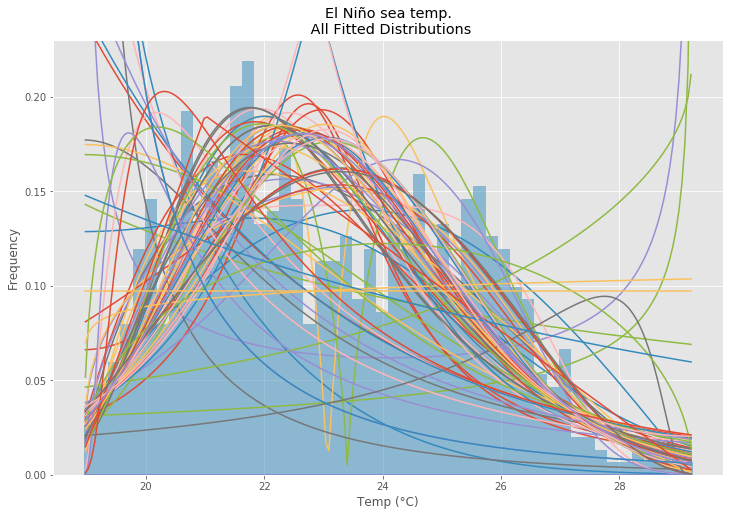

In [39]:
# Load data from statsmodels datasets
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color= [color['color'] for color in list(plt.rcParams['axes.prop_cycle'])][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

Text(0,0.5,'Frequency')

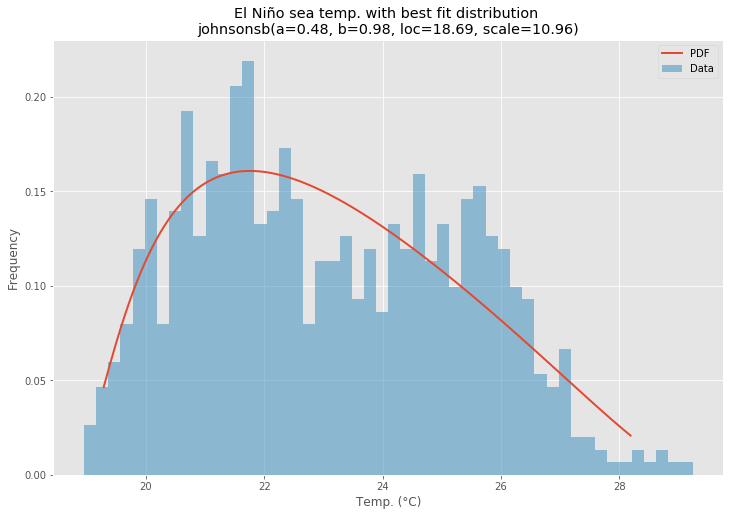

In [40]:
# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [46]:
# Test for normal distribution
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


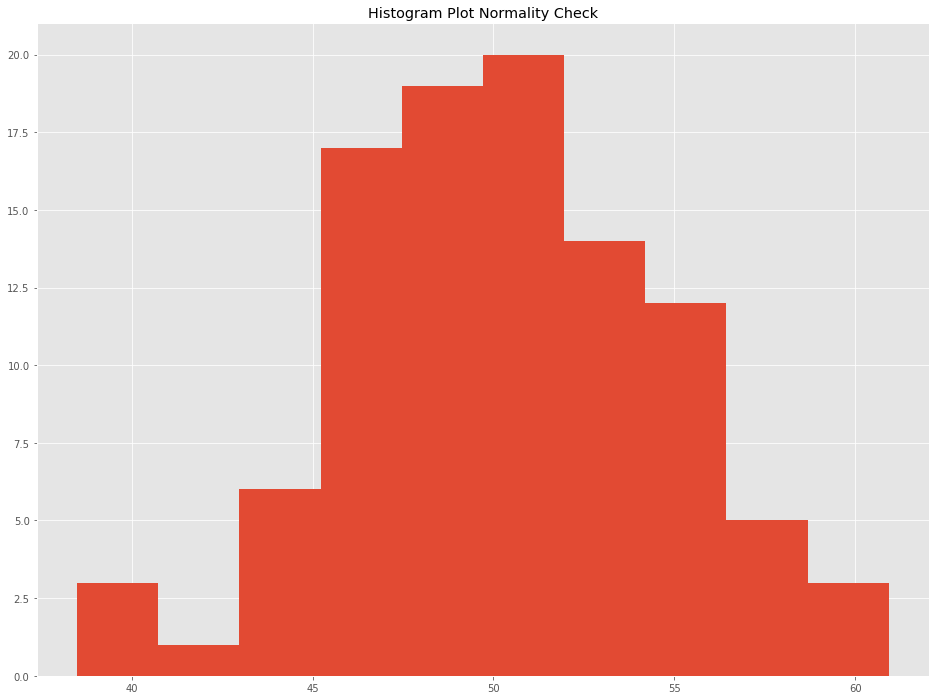

In [43]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# histogram plot
label='Histogram Plot Normality Check'
pyplot.hist(data)
matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None)
pyplot.show()

## Quantile-Quantile Plot

Another popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short.

##### This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

##### A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

We can develop a QQ plot in Python using the qqplot() statsmodels function. The function takes the data sample and by default assumes we are comparing it to a Gaussian distribution. We can draw the standardized line by setting the ‘line‘ argument to ‘s‘.

A complete example of plotting the test dataset as a QQ plot is provided below.

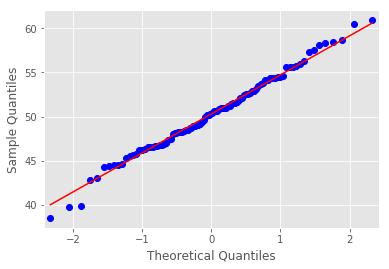

In [25]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(data, line='s')
pyplot.show()

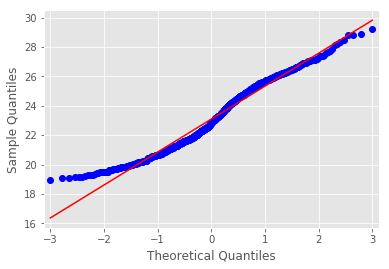

In [26]:
# Load data from statsmodels datasets
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# q-q plot
qqplot(data, line='s')
pyplot.show()

###### Source: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
## Interpretation of a Test

Before you can apply the statistical tests, you must know how to interpret the results.

Each test will return at least two things:

##### Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.

##### p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.

Each test calculates a test-specific statistic. This statistic can aid in the interpretation of the result, although it may require a deeper proficiency with statistics and a deeper knowledge of the specific statistical test. Instead, the p-value can be used to quickly and accurately interpret the statistic in practical applications.

#####  The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.
This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

## Shapiro-Wilk Test
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

#### In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

The shapiro() SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value.

The complete example of performing the Shapiro-Wilk test on the dataset is listed below.

In [27]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


D’Agostino’s K^2 Test
The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.
The D’Agostino’s K^2 test is available via the normaltest() SciPy function and returns the test statistic and the p-value.

The complete example of the D’Agostino’s K^2 test on the dataset is listed below.

In [44]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


Running the example calculates the statistic and prints the statistic and p-value.

The p-value is interpreted against an alpha of 5% and finds that the test dataset does not significantly deviate from normal.

## Anderson-Darling Test

Anderson-Darling Test is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.

It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

The anderson() SciPy function implements the Anderson-Darling test. It takes as parameters the data sample and the name of the distribution to test it against. By default, the test will check against the Gaussian distribution (dist=’norm’).

The complete example of calculating the Anderson-Darling test on the sample problem is listed below.

In [45]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


Running the example calculates the statistic on the test data set and prints the critical values.

Critical values in a statistical test are a range of pre-defined significance boundaries at which the H0 can be failed to be rejected if the calculated statistic is less than the critical value. Rather than just a single p-value, the test returns a critical value for a range of different commonly used significance levels.

We can interpret the results by failing to reject the null hypothesis that the data is normal if the calculated test statistic is less than the critical value at a chosen significance level.

We can see that at each significance level, the test has found that the data follows a normal distribution

## What Test Should You Use?

### Hard Fail
Your data may not be normal for lots of different reasons. Each test looks at the question of whether a sample was drawn from a Gaussian distribution from a slightly different perspective.

#### A failure of one normality test means that your data is not normal. As simple as that.

You can either investigate why your data is not normal and perhaps use data preparation techniques to make the data more normal.

Or you can start looking into the use of nonparametric statistical methods instead of the parametric methods.

### Soft Fail
If some of the methods suggest that the sample is Gaussian and some not, then perhaps take this as an indication that your data is Gaussian-like.

In many situations, you can treat your data as though it is Gaussian and proceed with your chosen parametric statistical methods.

In [49]:
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [50]:
get_best_distribution(data)

p value for norm = 0.9907332281148442
p value for exponweib = 0.0
p value for weibull_max = 0.0
p value for weibull_min = 0.0
p value for pareto = 2.8335112034483245e-12
p value for genextreme = 0.0
Best fitting distribution: norm
Best p value: 0.9907332281148442
Parameters for the best fit: (50.30291426037849, 4.4257810691579245)


('norm', 0.9907332281148442, (50.30291426037849, 4.4257810691579245))

There are two types of probability distributions, discrete and continuous probability distributions.
Discrete probability distributions are also called as probability mass functions. Some examples of discrete probability distributions are  Bernoulli distribution,  Binomial distribution, Poisson distribution and Geometric distribution.
Continuous probability distributions also known as probability density functions, they are functions that take on continuous values (e.g. values on the real line). Examples include the normal distribution, the exponential distribution and the beta distribution.
To understand more about discrete and continuous random variables, watch Khan academies probability distribution videos.

Date-Time

In [ ]:
from datetime import datetime

# references for abbreviations! :
# http://strftime.org/

Convert a single string to datetime

In [ ]:
datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
datetime_object

Extract a unit (e.g., year)

In [ ]:
datetime_object.year

In [ ]:
datetime_object.hour

In [ ]:
import pandas as pd

df = pd.read_csv("/Users/avahoffman/Dropbox/Insight/Insight_data_challenges/18C/data_challenge_4/redcard_1.csv")

# make a new column
df['birthdate'] = pd.to_datetime(df['birthday'], format='%d.%m.%Y', errors='ignore')
# Produces 'NaT' if cell is empty
# df['birthdate'] =  pd.to_datetime(df['birthday'], format='%d.%m.%Y', errors='coerce') 

# remove old column if needed
# df = df.drop(['birthday'], axis=1)

df.head()

Extract year, month etc into new columns

In [ ]:
df['year'], df['month'] = df['birthdate'].dt.year, df['birthdate'].dt.month
df.head()

Numbers to month name

In [ ]:
import calendar

df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])

df.head()

Calculate age / duration

In [ ]:
now = pd.Timestamp(datetime.now())

df['age'] = (now - df['birthdate']).astype('<m8[Y]')

df.head()

When century is not specified, it's a royal pain, but this will do it... hopefully.

In [ ]:
from datetime import datetime
from datetime import timedelta, date

df["birthdate"] = pd.to_datetime(df['date_of_birth'], format='%m/%d/%y', errors='ignore')
# weird correction if year does not specify century
future = df['birthdate'] > date(year=2019,month=1,day=1)
df.loc[future, 'birthdate'] -= timedelta(days=365.25*100)
now = pd.Timestamp(datetime.now())
df['age'] = (now - df['birthdate']).astype('<m8[Y]')
df['birth_month'] = df['birthdate'].dt.month

# Dealing with Imbalanced data
Options:
1.) Upsample minority cases (This could over-weight potential bias- depending on the data and problem.)
2.) Downsample majority cases (Also could pose problems.)
3.) Scale data

In [ ]:
from sklearn.utils import resample
# Get them down to less than 10,000 observations
# Separate majority and minority classes
df_majority = data2[data2['skin_tone'].isin([0.0, 0.125,0.25])]
df_minority = data2[-data2['skin_tone'].isin([0.0, 0.125,0.25])]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=20000,     # to match minority class
                                 random_state=123) # reproducible results
In [48]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.skin_tone.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64
Out[48]:
0.500    8973
0.250    8458
0.000    7598
1.000    7552
0.750    7065
0.375    5594
0.125    3944
0.875    2832
0.625    2412
Name: skin_tone, dtype: int64
In [49]:
tone_count = df_downsampled['skin_tone'].value_counts()
plt.figure(figsize=(17,3))
sns.set(style="darkgrid")
sns.barplot(tone_count.index, tone_count.values, alpha=0.9)
plt.title('Frequency Distribution of Skin Tone Ratings')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Skin Tone', fontsize=12)
plt.show()

In [64]:
# Visualize this a bit
pd_df = df_downsampled.sort_values(by = 'total_reds').reset_index(drop=True)
plt.figure(figsize=(17,3))
plt.title('% Distribution of Red Cards')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Skin Tone', fontsize=12)
sns.barplot(x="skin_tone", y="total_reds", data=pd_df, ci = None)

## Machine Learning
#### (Some common models)

##### Note: For predictive analytics, skLearn is great, if it is the stats you are more concerned with and do not need to predict a target variable, use stats models as the output is better when you need the actual stats results.

In [ ]:
One hot encoding for categorical variables is necessary for some models.
May also want to remove some unnecessary (or redundant) features.

data3 = data2.drop(['photoID', 'rater1', 'rater2'], axis=1)
cat_vars=['player','club', 'leaguecountry', 'position','ref', 'refcountry','skin_tone']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data3[var], prefix=var)
    data4=data3.join(cat_list)

In [ ]:
data4 = pd.get_dummies(data3)
data4.columns

In [ ]:
# Set up what predictor and outcome
test_vars=data4.columns.values.tolist()
y=['total_reds']
X=[i for i in test_vars if i not in y]

Feature Selection
We are using Recursive Feature Elimination: "works by recursively removing variables and building a model on those variables that remain. It uses the model accuracy to identify which variables (and combination of variables) contribute the most to predicting the target attribute." (from here)

This will be good to help us see what is the most influential feature in predicting whether or not someone will get a red card! Help from here.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Construct our Linear Regression model
X = data4[X]
y = data4[y]
lr = LinearRegression(normalize=True)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

In [ ]:
# Random Forest Version
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

In [ ]:
# Create a matrix to compare models
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

Supervised - Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
In [ ]:
boston = datasets.load_boston()
In [47]:
#Split and standardize data 
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
In [48]:
# For comparing rmse's across models. You could calculate another error metric or use sklearn's .score which outputs R^2 
def rmse(true, predicted):
    return np.sqrt(np.mean((true - predicted) ** 2))

Decision Tree

In [ ]:
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
print('Decision Tree RMSE: {}'.format(rmse(dt_preds, y_test)))

#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
Decision Tree RMSE: 4.174302714179495

Random Forest

In [ ]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print('Random Forest RMSE: {}'.format(rmse(rf_preds, y_test)))

#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
Random Forest RMSE: 3.1322610132487543

Bagging

In [ ]:
# Bagging
bag = BaggingRegressor()
bag.fit(X_train, y_train)
bag_preds = bag.predict(X_test)
print('Bagging RMSE: {}'.format(rmse(bag_preds, y_test)))

#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html
Bagging RMSE: 3.5952272605661673

K-Nearest Neighbors

In [ ]:
# K Nearest Neighbors
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print('KNN RMSE: {}'.format(rmse(knn_preds, y_test)))

#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
KNN RMSE: 4.55045243056497

Gradient Boosting

In [ ]:
# Gradient Boosting
boost = GradientBoostingRegressor()
boost.fit(X_train, y_train)
boost_preds = boost.predict(X_test)

print('Gradient Boosting RMSE: {}'.format(rmse(boost_preds, y_test)))
#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
Gradient Boosting RMSE: 2.797881262738919

AdaBoost

In [ ]:
# Adaboost
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_test)

print('AdaBoost RMSE: {}'.format(rmse(ada_preds, y_test)))
#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
AdaBoost RMSE: 3.6367482080683726

Supervised - Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import KFold, GridSearchCV

cancer = datasets.load_breast_cancer()

# Split  into training and test set (you may also want a validatioon set)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Decision Tree

In [ ]:
# Decision tree
dt = DecisionTreeClassifier(criterion="gini", splitter="best")
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

print('Decision Tree Accuracy: {}'.format(accuracy_score(dt_preds, y_test)))
print('Decision Tree Recall: {}'.format(recall_score(dt_preds, y_test)))
print('Decision Tree Precision: {}'.format(precision_score(dt_preds, y_test)))
Decision Tree Accuracy: 0.9370629370629371
Decision Tree Recall: 0.9550561797752809
Decision Tree Precision: 0.9444444444444444

Random Forest

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=10, criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features="auto", max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print('Random Forest Accuracy: {}'.format(accuracy_score(rf_preds, y_test)))
print('Random Forest Recall: {}'.format(recall_score(rf_preds, y_test)))
print('Random Forest Precision: {}'.format(precision_score(rf_preds, y_test)))
Random Forest Accuracy: 0.986013986013986
Random Forest Recall: 1.0
Random Forest Precision: 0.9777777777777777

Bagging

In [ ]:
# Bagging
bag = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)

bag.fit(X_train, y_train)
bag_preds = bag.predict(X_test)

print('Bagging Accuracy: {}'.format(accuracy_score(bag_preds, y_test)))
print('Bagging Recall: {}'.format(recall_score(bag_preds, y_test)))
print('Bagging Precision: {}'.format(precision_score(bag_preds, y_test)))
Bagging Accuracy: 0.9790209790209791
Bagging Recall: 0.9887640449438202
Bagging Precision: 0.9777777777777777

K-Nearest Neighbors

In [ ]:
# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform", algorithm="auto", leaf_size=30, p=2, metric="minkowski", metric_params=None, n_jobs=1)

knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

print('KNN Accuracy: {}'.format(accuracy_score(knn_preds, y_test)))
print('KNN Recall: {}'.format(recall_score(knn_preds, y_test)))
print('KNN Precision: {}'.format(precision_score(knn_preds, y_test)))
KNN Accuracy: 0.9790209790209791
KNN Recall: 0.978021978021978
KNN Precision: 0.9888888888888889

Gradient Boosting

In [ ]:
# Gradient Boosting
boost = GradientBoostingClassifier(loss="deviance", learning_rate=0.1, n_estimators=100, subsample=1.0, criterion="friedman_mse", min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort="auto")

boost.fit(X_train, y_train)
boost_preds = boost.predict(X_test)
print('Gradient Boosting Accuracy: {}'.format(accuracy_score(boost_preds, y_test)))
print('Gradient Boosting Recall: {}'.format(recall_score(boost_preds, y_test)))
print('Gradient Boosting Precision: {}'.format(precision_score(boost_preds, y_test)))
Gradient Boosting Accuracy: 0.986013986013986
Gradient Boosting Recall: 0.9888888888888889
Gradient Boosting Precision: 0.9888888888888889

AdaBoost

In [ ]:
# Adaboost
ada = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm="SAMME.R", random_state=None)
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_test)
print('AdaBoost Accuracy: {}'.format(accuracy_score(ada_preds, y_test)))
print('AdaBoost Recall: {}'.format(recall_score(ada_preds, y_test)))
print('AdaBoost Precision: {}'.format(precision_score(ada_preds, y_test)))
AdaBoost Accuracy: 0.993006993006993
AdaBoost Recall: 1.0
AdaBoost Precision: 0.9888888888888889

Decide Best Model

In [ ]:
# Decide Best model
# Grid search for best params

# ada example
ada_boost_grid = {'n_estimators': [50, 100, 150, 200],
                      'random_state': [1, None],
                      'learning_rate': [0.1, .5, 1]}

ada_gridsearch = GridSearchCV(AdaBoostClassifier(),
                             ada_boost_grid,
                             n_jobs=-1,
                             verbose=True)
ada_gridsearch.fit(X_train, y_train)

best_ada_model = ada_gridsearch.best_estimator_
best_ada_model.fit(X_train, y_train)
best_ada_preds = best_ada_model.predict(X_test)

print("Best ADA Accuracy: {}".format(accuracy_score(best_ada_preds, y_test)))
print("Best ADA Recall: {}".format(recall_score(best_ada_preds, y_test)))
print("Best ADA Precision: {}".format(precision_score(best_ada_preds, y_test)))
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   12.1s finished
Best ADA Accuracy: 0.993006993006993
Best ADA Recall: 1.0
Best ADA Precision: 0.9888888888888889

Unsupervised

In [ ]:
from sklearn.cluster import KMeans
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

K-Means

(K-Means is really more of a partitioning algorithm than a clustering algorithm.)

In [ ]:
#k Means
k_means = KMeans(n_clusters=3) 
k_means.fit(X_train)
y_preds = k_means.predict(X_test)
print('Actual labels for training set: {}'.format(y_train))
print('Predicted labels for training set: {}'.format(k_means.labels_))

print('Actual labels for test set: {}'.format(y_test))
print('Predicted labels for training set: {}'.format(y_preds))

https://github.com/avahoffman/practice_notebooks/blob/master/visualization.py

In [ ]:
# CATPLOT
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="tone", kind="count", palette="pastel", data=df)
sns.catplot(x="tone", kind="count", hue="yellowCards", palette="pastel", data=df[df['yellowCards'] != 0])
sns.catplot(x="tone", kind="count", hue="yellowReds", palette="pastel", data=df[df['yellowReds'] != 0])
sns.catplot(x="tone", kind="count", hue="redCards", palette="pastel", data=df[df['redCards'] != 0])

### Stats Models

In [ ]:
# Ordinary Least Squares
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2

results = smf.ols('np.log(yellowCards+1) ~ club + birthyear + height + weight + position + games + rating', 
                  data = df_modeling).fit()
print(results.summary())

In [ ]:
# Results of OLS
print('R2 value is : {a:0.3f}'.format(a = results.rsquared))
print('Coefficient on rating: {a:0.3f}'.format(a = results.params[-1]))
ci_df = results.conf_int()
print('\nConfidence interval on rating:')
ci_df.tail(1)

# Residual Plot
sns.distplot(results.resid)
plt.show()

# qq plot
res = results.resid 
fig = sm.qqplot(res)
plt.ylim([-2.5, 2.5])
plt.show()

# Leverage vs residuals
# https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

In [ ]:
# PAIRPLOT
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

sns.pairplot(player_data)
plt.show()

In [ ]:
# Then look at one or more of the plots closer-up if needed.
sns.distplot(player_data.iloc[:, 11])
plt.show()

In [ ]:
# Linear Regression
# direct red cards only
X = np.array(df_by_playerColor.color).reshape(-1,1)
y = df_by_playerColor.rc_g

lm = linear_model.LinearRegression()
lm.fit(X, y)

print('Model: ' + str(lm.intercept_) + ' + ' + str(lm.coef_) + ' R squared: ' + str(lm.score(X,y)))
Model: 0.003931825384189343 + [0.00111294] R squared: 0.002197744570811122
One-way ANOVA:

In [134]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('rc_g ~ color',
                data=df_by_playerColor).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

In [ ]:
#One-way ANOVA:

In [137]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('red ~ color',
                data=df_by_playerColor).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

In [ ]:
# Function for fitting multiple regression models for different categories of data
# Are there racist referees? Summarize red card mean by refNum and player color
ref_color = df_nn.groupby(['refNum', 'color'])['red'].mean().reset_index()

referees = df_nn.refNum.unique()

# now regression for each ref
refs = []
fits = []
r2 = []
for ref in referees:
    data = ref_color[ref_color.refNum == ref]
    X = np.array(data.color).reshape(-1,1) # -1 means 'leave dimension alone'
    y = data.red

    lm = linear_model.LinearRegression()
    lm.fit(X, y)
    fits.append(lm.coef_[0])
    refs.append(ref)
    r2.append(lm.score(X,y))
    
ref_fits = pd.DataFrame({'refs': refs, 'fits': fits, 'r2': r2})
ref_fits.sort_values('fits', ascending=False)

In [ ]:
sns.distplot(ref_fits.fits, hist=False, kde=True, rug=True)